In [1]:
from models.detectors.zid_rcnn import ZidRCNN

def build_detector(model_cfg):
    model_cfg_ = model_cfg.copy()

    model_type = model_cfg_.pop('type') 
    assert model_type == 'ZidRCNN', f'{model_type} is not implemented yet.'
    return ZidRCNN(**model_cfg_)

In [2]:
from data.builder import build_dataset

In [3]:
import importlib.util
def get_config_from_file(filename, mode):
    spec = importlib.util.spec_from_file_location(mode, filename)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)

    # Create a dictionary from module attributes
    config_dict = {key: getattr(module, key) for key in dir(module) if not key.startswith('__')}
    return config_dict

In [17]:
cfg = get_config_from_file('configs/train_reconstruction_conf.py', 'reconstruction')
model = build_detector(cfg.get('model'))
dataset = build_dataset(cfg.get('data')['train'])

/home/minhnh/python_venv/cv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/minhnh/python_venv/cv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


load model from: torchvision://resnet50
This is Phase 1, Voxel Reconstruction Training Phase
Loading images...


100%|██████████| 9600/9600 [00:01<00:00, 5598.64it/s]


Videos: 9600
Loading object size from existing path (we will first crop then resize the image for recon)


In [14]:
from torch.utils.data import DataLoader
from models.utils.data_container import collate
from functools import partial

In [10]:
batch_size=8
num_workers=8

In [18]:
data = DataLoader(dataset,
                batch_size=batch_size,
                shuffle=False,
                num_workers=num_workers,
                pin_memory=True,
                collate_fn=partial(collate, samples_per_gpu=batch_size),
                # sampler=self.train_sampler,
                drop_last = True)

In [19]:
for x in data:
    print(x)
    break

{'rgb': tensor([[[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],

          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],

          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],


         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0

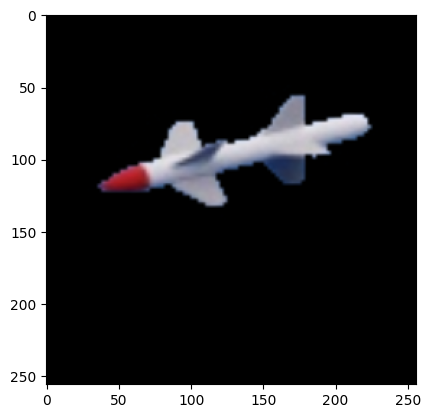

In [44]:
plt.imshow(x['rgb'][7][34].permute(1, 2, 0))

In [45]:
"_ep01_100000".split("_")

['', 'ep01', '100000']

In [46]:
'ep01'[2:]

'01'

In [90]:
!python train.py --cuda_devices 0,1,2,3

Logging to ./results
Loading dataset ...
This is Phase 1, Voxel Reconstruction Training Phase
Loading images...
100%|█████████████████████████████████████| 9600/9600 [00:01<00:00, 5592.22it/s]
Videos: 9600
Loading object size from existing path (we will first crop then resize the image for recon)
training...
Training on 4 GPUs: 0,1,2,3
/home/tungnt/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tungnt/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/tungnt/.local/lib/pytho

In [ ]:
!python train.py --cuda_devices 0,1,2,3 --phase detection --config configs/train_detection_conf.py

Logging to ./results
Loading dataset ...
loading annotations into memory...
Done (t=30.05s)
creating index...
index created!
Dataset scale (before filtering):
 Images:55000
 Instances:180000
training...
Training on 4 GPUs: 0,1,2,3
load model from: torchvision://resnet50
load model from: torchvision://resnet50
load model from: torchvision://resnet50
load model from: torchvision://resnet50
Rank: 0 - Device: cuda:0 0
Rank: 1 - Device: cuda:1 1
Rank: 3 - Device: cuda:3 3
Rank: 2 - Device: cuda:2 2
/home/tungnt/.local/lib/python3.8/site-packages/torch/nn/functional.py:4377: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/tungnt/.local/lib/python3.8/site-packages/torch/nn/functional.py:4316: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Pl